## Example 4: Five dimensional regime model
state process

$\alpha=1$

\begin{align}
d\begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \end{bmatrix}
=\begin{bmatrix}-2 & 1 & 1 & 0 & 0 \\ 0 & -1 & 0 & 0 & 0\\ 0 & 0 & -1 & 0 & 0 \\0 & 0 & 0 & -1 & 0
\\ 0 & 0 & 0 & 1 & -2 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \end{bmatrix} + dw(t)
\end{align}

$\alpha=2$ 

\begin{align}
d\begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \end{bmatrix}
=\begin{bmatrix} -2 & 1 & 0 & 0 & 0 \\ 0 & -1 & 0 & 0 & 0\\ 0 & 0 & -1 & 0 & 0 \\0 & 0 & 1 & -2 & 0
\\ 0 & 0 & 1 & 0 & -1 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \end{bmatrix} +dw(t)
\end{align}


observation process

\begin{align}
d \begin{bmatrix} y_1 \\ y_2 \\ y_3 \\ y_4 \\ y_5 \end{bmatrix} 
=\begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \end{bmatrix}dt + \sigma_1 dv(t)
\end{align}




In [1]:
import ex4_loader
import ex4_generator
import numpy as np
import pandas as pd
import sys
sys.path.append('..')
import nn_DF
import matplotlib.pyplot as plt
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='svg'
from sklearn.metrics import mean_squared_error

dimX=5; N=100; n0=10; eta=0.04; dimY=5

In [2]:
PATH_TRAIN='../data/ex4Train.pklz'

training_data, validation_data, test_data,\
data_mean, data_std, label_mean, label_std=ex4_loader.load_data_wrapper(PATH_TRAIN)

test_data_data=[x for x,y in test_data]
test_data_label=[y for x,y in test_data]
test_data_label=np.array(test_data_label)
test_data_label=test_data_label.reshape(len(test_data_label),dimX)
len(training_data)

16956

### Build Model

In [3]:
# The num of first layer is n0*dimY, the num of last layer is dimX.
net=nn_DF.Network([n0*dimY, 128, 64, 32, 8, dimX])
epoch=200

In [4]:
tcMSE_EpochAdalr1,tcRel_EpochAdalr1, ecMSE_EpochAdalr1, ecRel_EpochAdalr1, w_EpochAdalr1, b_EpochAdalr1, EpochAdalr1\
=net.SGD_EpochAdalr(training_data, epoch, 64, 0.001, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)
tcMSE_EpochAdalr5, tcRel_EpochAdalr5, ecMSE_EpochAdalr5, ecRel_EpochAdalr5, w_EpochAdalr5, b_EpochAdalr5, EpochAdalr5\
=net.SGD_EpochAdalr(training_data, epoch, 64, 0.005, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)
tcMSE_EpochAdalr10, tcRel_EpochAdalr10, ecMSE_EpochAdalr10, ecRel_EpochAdalr10, w_EpochAdalr10, b_EpochAdalr10, EpochAdalr10\
=net.SGD_EpochAdalr(training_data, epoch, 64, 0.01, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)

-----------------------------
Epoch Adaptive lr begins.
Initial eta is: 0.001
The eta of Epoch 0 is 0.0012523801373646938
Epoch 0: 1.1232024628579325
The eta of Epoch 1 is 0.001354221996877324
Epoch 1: 1.0183236914614902
The eta of Epoch 2 is 0.0013877310565098323
Epoch 2: 0.9796925908620054
The eta of Epoch 3 is 0.0014010090730781845
Epoch 3: 0.967839116732232
The eta of Epoch 4 is 0.0014081288015743811
Epoch 4: 0.9640932929269206
The eta of Epoch 5 is 0.001411721037160051
Epoch 5: 0.9614245254804875
The eta of Epoch 6 is 0.001418662878257825
Epoch 6: 0.9599187714656101
The eta of Epoch 7 is 0.0014210194529725374
Epoch 7: 0.9584895441205427
The eta of Epoch 8 is 0.0014367680268869245
Epoch 8: 0.9568605346864157
The eta of Epoch 9 is 0.0014396580173853138
Epoch 9: 0.9556608735398663
The eta of Epoch 10 is 0.0014429266884696472
Epoch 10: 0.9544304474759335
The eta of Epoch 11 is 0.001447016632196984
Epoch 11: 0.9530622735493575
The eta of Epoch 12 is 0.0014532958224819142
Epoch 12: 0.95

In [5]:
tcMSE_constlr1, tcRel_constlr1, ecMSE_constlr1, ecRel_constlr1, w_constlr1, b_constlr1,constlr1\
=net.SGD_Constlr(training_data, epoch, 64, 0.001, evaluation_data=validation_data)
tcMSE_constlr5, tcRel_constlr5, ecMSE_constlr5, ecRel_constlr5, w_constlr5, b_constlr5, constlr5\
=net.SGD_Constlr(training_data, epoch, 64, 0.005, evaluation_data=validation_data)
tcMSE_constlr10, tcRel_constlr10, ecMSE_constlr10, ecRel_constlr10, w_constlr10, b_constlr10, constlr10\
=net.SGD_Constlr(training_data, epoch, 64, 0.01, evaluation_data=validation_data)

-----------------------------
Constant learning rate begins.
Initial eta is: 0.001
The eta of Epoch 0 is 0.001
Epoch 0: 1.1229969855474555
The eta of Epoch 1 is 0.001
Epoch 1: 1.032189542477913
The eta of Epoch 2 is 0.001
Epoch 2: 0.9913832596114195
The eta of Epoch 3 is 0.001
Epoch 3: 0.9747772633509512
The eta of Epoch 4 is 0.001
Epoch 4: 0.9681237996234267
The eta of Epoch 5 is 0.001
Epoch 5: 0.9645884913979834
The eta of Epoch 6 is 0.001
Epoch 6: 0.9627276818681256
The eta of Epoch 7 is 0.001
Epoch 7: 0.9612723648517243
The eta of Epoch 8 is 0.001
Epoch 8: 0.960194966452272
The eta of Epoch 9 is 0.001
Epoch 9: 0.959219304429577
The eta of Epoch 10 is 0.001
Epoch 10: 0.9580468164353185
The eta of Epoch 11 is 0.001
Epoch 11: 0.9572801268673335
The eta of Epoch 12 is 0.001
Epoch 12: 0.9559478388403538
The eta of Epoch 13 is 0.001
Epoch 13: 0.9551422250535249
The eta of Epoch 14 is 0.001
Epoch 14: 0.9541979234569014
The eta of Epoch 15 is 0.001
Epoch 15: 0.953069162107248
The eta of Ep

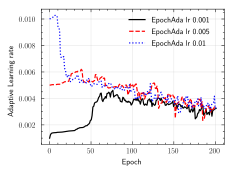

In [13]:
epochs=np.linspace(0,epoch+1,epoch+1)

import matplotlib.pyplot as plt
plt.style.reload_library()
with plt.style.context(['science','ieee']):

    plt.plot(epochs,EpochAdalr1, epochs,EpochAdalr5, epochs, EpochAdalr10,linewidth=1.2)
    plt.grid(alpha=0.35)
    plt.legend(["EpochAda lr 0.001","EpochAda lr 0.005","EpochAda lr 0.01"], edgecolor="black")
    plt.xlabel("Epoch")
    plt.ylabel("Adaptive Learning rate")
plt.savefig("../img/ex4-lr.pdf", dpi=600,bbox_inches = 'tight')

In [15]:
EpochAdalr1[-1]

0.0032426270651942013

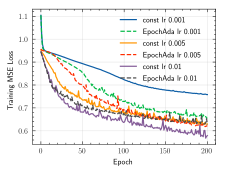

In [12]:
Epochs=np.linspace(0,epoch,epoch)

import matplotlib.pyplot as plt
plt.style.reload_library()
with plt.style.context(['science','ieee','std-colors']):
# plt.plot(Epochs, tcMSE_constlr1,'k', Epochs, tcMSE_EpochAdalr1,"r--", Epochs, tcMSE_constlr5,'c',\
       #  Epochs,tcMSE_EpochAdalr5,'b--',Epochs, tcMSE_constlr10,'g',Epochs,tcMSE_EpochAdalr10,'m--',linewidth=1.2)

       plt.plot(Epochs, tcMSE_constlr1, Epochs, tcMSE_EpochAdalr1,"--", Epochs, tcMSE_constlr5,\
         Epochs,tcMSE_EpochAdalr5,'--',Epochs, tcMSE_constlr10,Epochs,tcMSE_EpochAdalr10,'--',linewidth=1.2)

       plt.grid(alpha=0.35)
       plt.legend(["const lr 0.001","EpochAda lr 0.001","const lr 0.005","EpochAda lr 0.005","const lr 0.01","EpochAda lr 0.01"],edgecolor="black")
       plt.xlabel("Epoch")
       plt.ylabel("Training MSE Loss")

plt.savefig("../img/ex4-loss.pdf", dpi=600,bbox_inches = 'tight')

### Compute relative errors

In [9]:
def relative_err(y_true, y_pred):
    """Compute Relative Error"""
    abs_sum=np.sum(np.abs(y_true-y_pred))
    return abs_sum/(np.sum(np.abs(y_true))+np.sum(np.abs(y_pred)))

def ComputeError(pred, label,label_mean, label_std, dimX):
    pred=np.array(pred)
    pred=pred.reshape(len(pred),dimX)
    for k in range(len(pred)):
        pred[k,:]=pred[k,:]*label_std+label_mean
    RelErr=relative_err(pred, label)
    mseErr=mean_squared_error(pred, label)
    print("MSE and Relative_error are: {0},{1} resp.".format(mseErr, RelErr))

Repeat Monte Carlo 256 times to compute the average relative error on new-generated data

In [10]:
import ex4_generator

N_sample=256
P= np.array([[0.98,0.02],[0.02,0.98]])

TotalDatas=[]; TotalLabels=np.zeros(((N-n0+2)*N_sample,dimX))

for i in range(N_sample):
    alpha=ex4_generator.mChain(N,P)
    datas1, labels1, x_new1=ex4_generator.generate_new_data(data_mean, data_std, alpha)
    TotalDatas.extend(datas1)
    x_new1=x_new1[n0-1:]
    TotalLabels[i*(N-n0+2):(i+1)*(N-n0+2)]=x_new1

In [11]:
NewPred_constlr1=net.predict(TotalDatas, w_constlr1, b_constlr1, label=False)
NewPred_constlr5=net.predict(TotalDatas, w_constlr5, b_constlr5, label=False)
NewPred_constlr10=net.predict(TotalDatas, w_constlr10, b_constlr10, label=False)
NewPred_EpochAdalr1=net.predict(TotalDatas, w_EpochAdalr1, b_EpochAdalr1, label=False)
NewPred_EpochAdalr5=net.predict(TotalDatas, w_EpochAdalr5, b_EpochAdalr5, label=False)
NewPred_EpochAdalr10=net.predict(TotalDatas, w_EpochAdalr10, b_EpochAdalr10, label=False)

ComputeError(NewPred_constlr1, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_constlr5, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_constlr10, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr1, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr5, TotalLabels, label_mean, label_std, dimX)
ComputeError(NewPred_EpochAdalr10, TotalLabels, label_mean, label_std, dimX)

MSE and Relative_error are: 0.3901105861478869,0.6117873577343477 resp.
MSE and Relative_error are: 0.38777803760324103,0.556523216427958 resp.
MSE and Relative_error are: 0.41389021934602965,0.5633809460776568 resp.
MSE and Relative_error are: 0.37592923221611513,0.5632282296678653 resp.
MSE and Relative_error are: 0.38567717444986965,0.5624385822982574 resp.
MSE and Relative_error are: 0.3840524120611672,0.5649008660477126 resp.


### Plot sample path

According to the evolution of the adaptive learning rate, it converges to around 0.003.
We retrain the model with learning rate 0.003.

In [16]:
np.random.seed(6)
ru=np.random.uniform(0,1,size=N)
P= np.array([[0.98,0.02],[0.02,0.98]])
alpha=ex4_generator.mChain(N,P,ru)
datas, labels, x_new =ex4_generator.generate_new_data(data_mean, data_std, alpha)

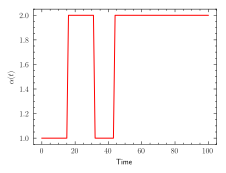

In [17]:
plt.style.reload_library()
with plt.style.context(['science','ieee']):

    plt.plot(alpha,'r')
    plt.xlabel("Time")
    plt.ylabel(r'$ \alpha (t) $')
# plt.savefig("../img/ex4-alpha.pdf", dpi=600,bbox_inches = 'tight')

In [18]:
tcMSE_constlr, tcRel_constlr, ecMSE_constlr, ecRel_constlr, w_constlr, b_constlr,constlr\
=net.SGD_Constlr(training_data, epoch, 64, 0.003, evaluation_data=validation_data)

tcMSE_EpochAdalr,tcRel_EpochAdalr, ecMSE_EpochAdalr, ecRel_EpochAdalr, w_EpochAdalr, b_EpochAdalr, EpochAdalr\
=net.SGD_EpochAdalr(training_data,  epoch, 64, 0.003, 0.001, 0.01, modified=False, monitor_cost=True,evaluation_data=validation_data)

-----------------------------
Constant learning rate begins.
Initial eta is: 0.003
The eta of Epoch 0 is 0.003
Epoch 0: 0.9914725076183606
The eta of Epoch 1 is 0.003
Epoch 1: 0.9648934326417128
The eta of Epoch 2 is 0.003
Epoch 2: 0.96004229932566
The eta of Epoch 3 is 0.003
Epoch 3: 0.9574556286931057
The eta of Epoch 4 is 0.003
Epoch 4: 0.9543410896450916
The eta of Epoch 5 is 0.003
Epoch 5: 0.9512183087158543
The eta of Epoch 6 is 0.003
Epoch 6: 0.9473996758016677
The eta of Epoch 7 is 0.003
Epoch 7: 0.9437866792545994
The eta of Epoch 8 is 0.003
Epoch 8: 0.9403132456536384
The eta of Epoch 9 is 0.003
Epoch 9: 0.9368925382131904
The eta of Epoch 10 is 0.003
Epoch 10: 0.9329526082254306
The eta of Epoch 11 is 0.003
Epoch 11: 0.9296090170901572
The eta of Epoch 12 is 0.003
Epoch 12: 0.925124616246871
The eta of Epoch 13 is 0.003
Epoch 13: 0.9222530990764797
The eta of Epoch 14 is 0.003
Epoch 14: 0.918636270850625
The eta of Epoch 15 is 0.003
Epoch 15: 0.9153307494222307
The eta of Ep

In [19]:
x0=np.array([[1],[-1],[1],[-1],[1]])

pr_const=net.predict(datas,w_constlr5, b_constlr5,label=False)
pr_const=np.array(pr_const)
pr_const=pr_const.reshape(len(pr_const),dimX)
for k in range(N-n0+2):
    pr_const[k,:]=pr_const[k,:]*label_std+label_mean
const_new=[x0 for k in range(n0-1)]
const_new=np.array(const_new)
const_new=const_new.reshape(n0-1,dimX)
const_new=np.vstack((const_new,pr_const))

In [20]:
pr_ada=net.predict(datas,w_EpochAdalr5, b_EpochAdalr5,label=False)
pr_ada=np.array(pr_ada)
pr_ada=pr_ada.reshape(len(pr_ada),dimX)
for k in range(N-n0+2):
    pr_ada[k,:]=pr_ada[k,:]*label_std+label_mean
ada_new=[x0 for k in range(n0-1)]
ada_new=np.array(ada_new)
ada_new=ada_new.reshape(n0-1,dimX)
ada_new=np.vstack((ada_new,pr_ada))

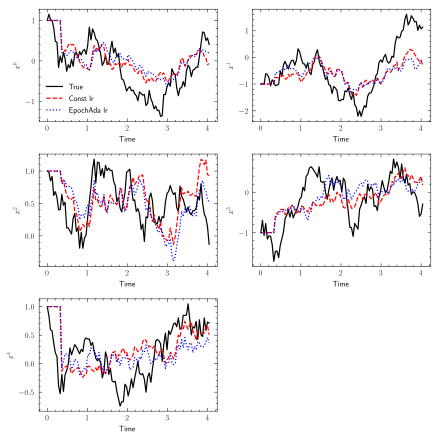

In [22]:
import matplotlib.gridspec as gridspec
plt.rcParams.update(plt.rcParamsDefault)

import matplotlib.pyplot as plt
plt.style.reload_library()
with plt.style.context(['science','ieee']):

    axis=np.linspace(0,eta*(N+1),N+1)
    fig=plt.figure(figsize=(6,6), constrained_layout=True) # constrained_layout: set the gap between figures    
    gs=gridspec.GridSpec(3,4, figure=fig)

    ax1=fig.add_subplot(gs[0,0:2])
    ax1.plot(axis,x_new[:,0],axis,const_new[:,0],axis, ada_new[:,0],linewidth=1.2)
    ax1.minorticks_on()
    ax1.set(xlabel="Time", ylabel="$x^0$")

    ax2=fig.add_subplot(gs[0,2:4])
    ax2.minorticks_on()
    ax2.plot(axis, x_new[:,1],axis,const_new[:,1],axis, ada_new[:,1],linewidth=1.2)
    ax2.set(xlabel="Time", ylabel="$x^1$")

    ax3=fig.add_subplot(gs[1,0:2])
    ax3.minorticks_on()
    ax3.plot(axis, x_new[:,2],axis,const_new[:,2],axis,ada_new[:,2],linewidth=1.2)
    ax3.set(xlabel="Time", ylabel="$x^2$")

    ax4=fig.add_subplot(gs[1,2:4])
    ax4.minorticks_on()
    ax4.plot(axis, x_new[:,3],axis,const_new[:,3],axis, ada_new[:,3],linewidth=1.2)
    ax4.set(xlabel="Time", ylabel="$x^3$")

    ax5=fig.add_subplot(gs[2,0:2])
    ax5.minorticks_on()
    ax5.plot(axis, x_new[:,4],axis,const_new[:,4],axis, ada_new[:,4],linewidth=1.2)
    ax5.set(xlabel="Time", ylabel="$x^4$")

    ax1.legend(["True","Const lr","EpochAda lr"],prop={'size':8},edgecolor="black")

plt.savefig("../img/ex4-path.pdf", dpi=600,bbox_inches = 'tight')

Plot the original sample path

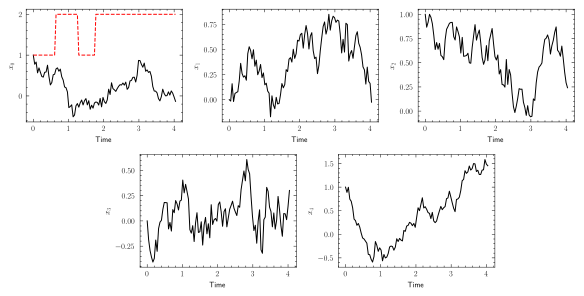

In [5]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
plt.style.reload_library()
with plt.style.context(['science','ieee']):

    axis=np.linspace(0,eta*(N+1),N+1)
    fig=plt.figure(figsize=(8,4), constrained_layout=True) # constrained_layout: set the gap between figures
    gs=gridspec.GridSpec(2,6, figure=fig)
    ax1=fig.add_subplot(gs[0,0:2])
    ax1.plot(axis,x_new[:,0], axis, alpha, 'r',linewidth=1.0)
    ax1.minorticks_on()
    ax1.set(xlabel="Time", ylabel="$x_0$")
    #ax1.set_xlim(0,1)

    ax2=fig.add_subplot(gs[0,2:4])
    ax2.plot(axis, x_new[:,1],linewidth=1.0)
    ax2.minorticks_on()
    ax2.set(xlabel="Time", ylabel="$x_1$")

    ax3=fig.add_subplot(gs[0,4:6])
    ax3.plot(axis, x_new[:,2], linewidth=1.0)
    ax3.minorticks_on()
    ax3.set(xlabel="Time", ylabel="$x_2$")

    ax4=fig.add_subplot(gs[1,1:3])
    ax4.plot(axis, x_new[:,3], linewidth=1.0)
    ax4.minorticks_on()
    ax4.set(xlabel="Time", ylabel="$x_3$")

    ax5=fig.add_subplot(gs[1,3:5])
    ax5.plot(axis, x_new[:,4], linewidth=1.0)
    ax5.minorticks_on()
    ax5.set(xlabel="Time", ylabel="$x_4$")